In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from google.colab import drive
drive.mount('/content/drive')

import os

# Path of folder
folder_path = '/content/drive/MyDrive/Colab Notebooks/2024_07_31 PU0031/PU0031/'

# Get list of all CSV files in the folder
csv_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initialize an empty list to hold the dataframes
dfs = []

# Loop through the CSV files and read each one into a dataframe
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

# Concatenate all dataframes into a single dataframe
data = pd.concat(dfs, ignore_index=True)
# Remove rows with specific alarm names
#data = data[~data['Alarm Name'].isin(['Battery Deep Discharge Alarm', 'Battery Deep Discharge Alarm ','Cell Out of Service'])]

unique_alarms = data['Alarm Name'].unique()
unique_alarms_sorted = np.sort(unique_alarms)

for alarm in unique_alarms_sorted:
    print(f'"{alarm}"')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
"BBU CPRI Interface Error"
"Base Station DC Power Supply Abnormal"
"Battery Deep Discharge Alarm"
"Battery Deep Discharge Alarm "
"Board Configuration Error"
"Carrier Configuration Error"
"Cell Capability Degraded"
"Cell Out of Service"
"Cell Unavailable"
"Data Configuration Exceeding Licensed Limit"
"ESL Link Fault"
"Ethernet Link Fault"
"Inter-System Board Object Configuration Conflict"
"Inter-System RF Unit Parameter Settings Conflict"
"Mains Failure Alarm"
"Mains Failure Alarm "
"NE Is Disconnected"
"OML Fault"
"RF Unit Clock Problem"
"RF Unit Maintenance Link Failure"
"RF Unit RX Channel RTWP/RSSI Unbalanced"
"RF Unit TX Channel Gain Out of Range"
"RF Unit VSWR Threshold Crossed"
"Radio Signaling Link Disconnected"
"Rectifier Failure Alarm"
"Remote Maintenance Link Failure"
"S1 Interface Fault"
"SCTP Link Congestion"
"SCTP Link Fault"
"Theft Alarm"
"Tran

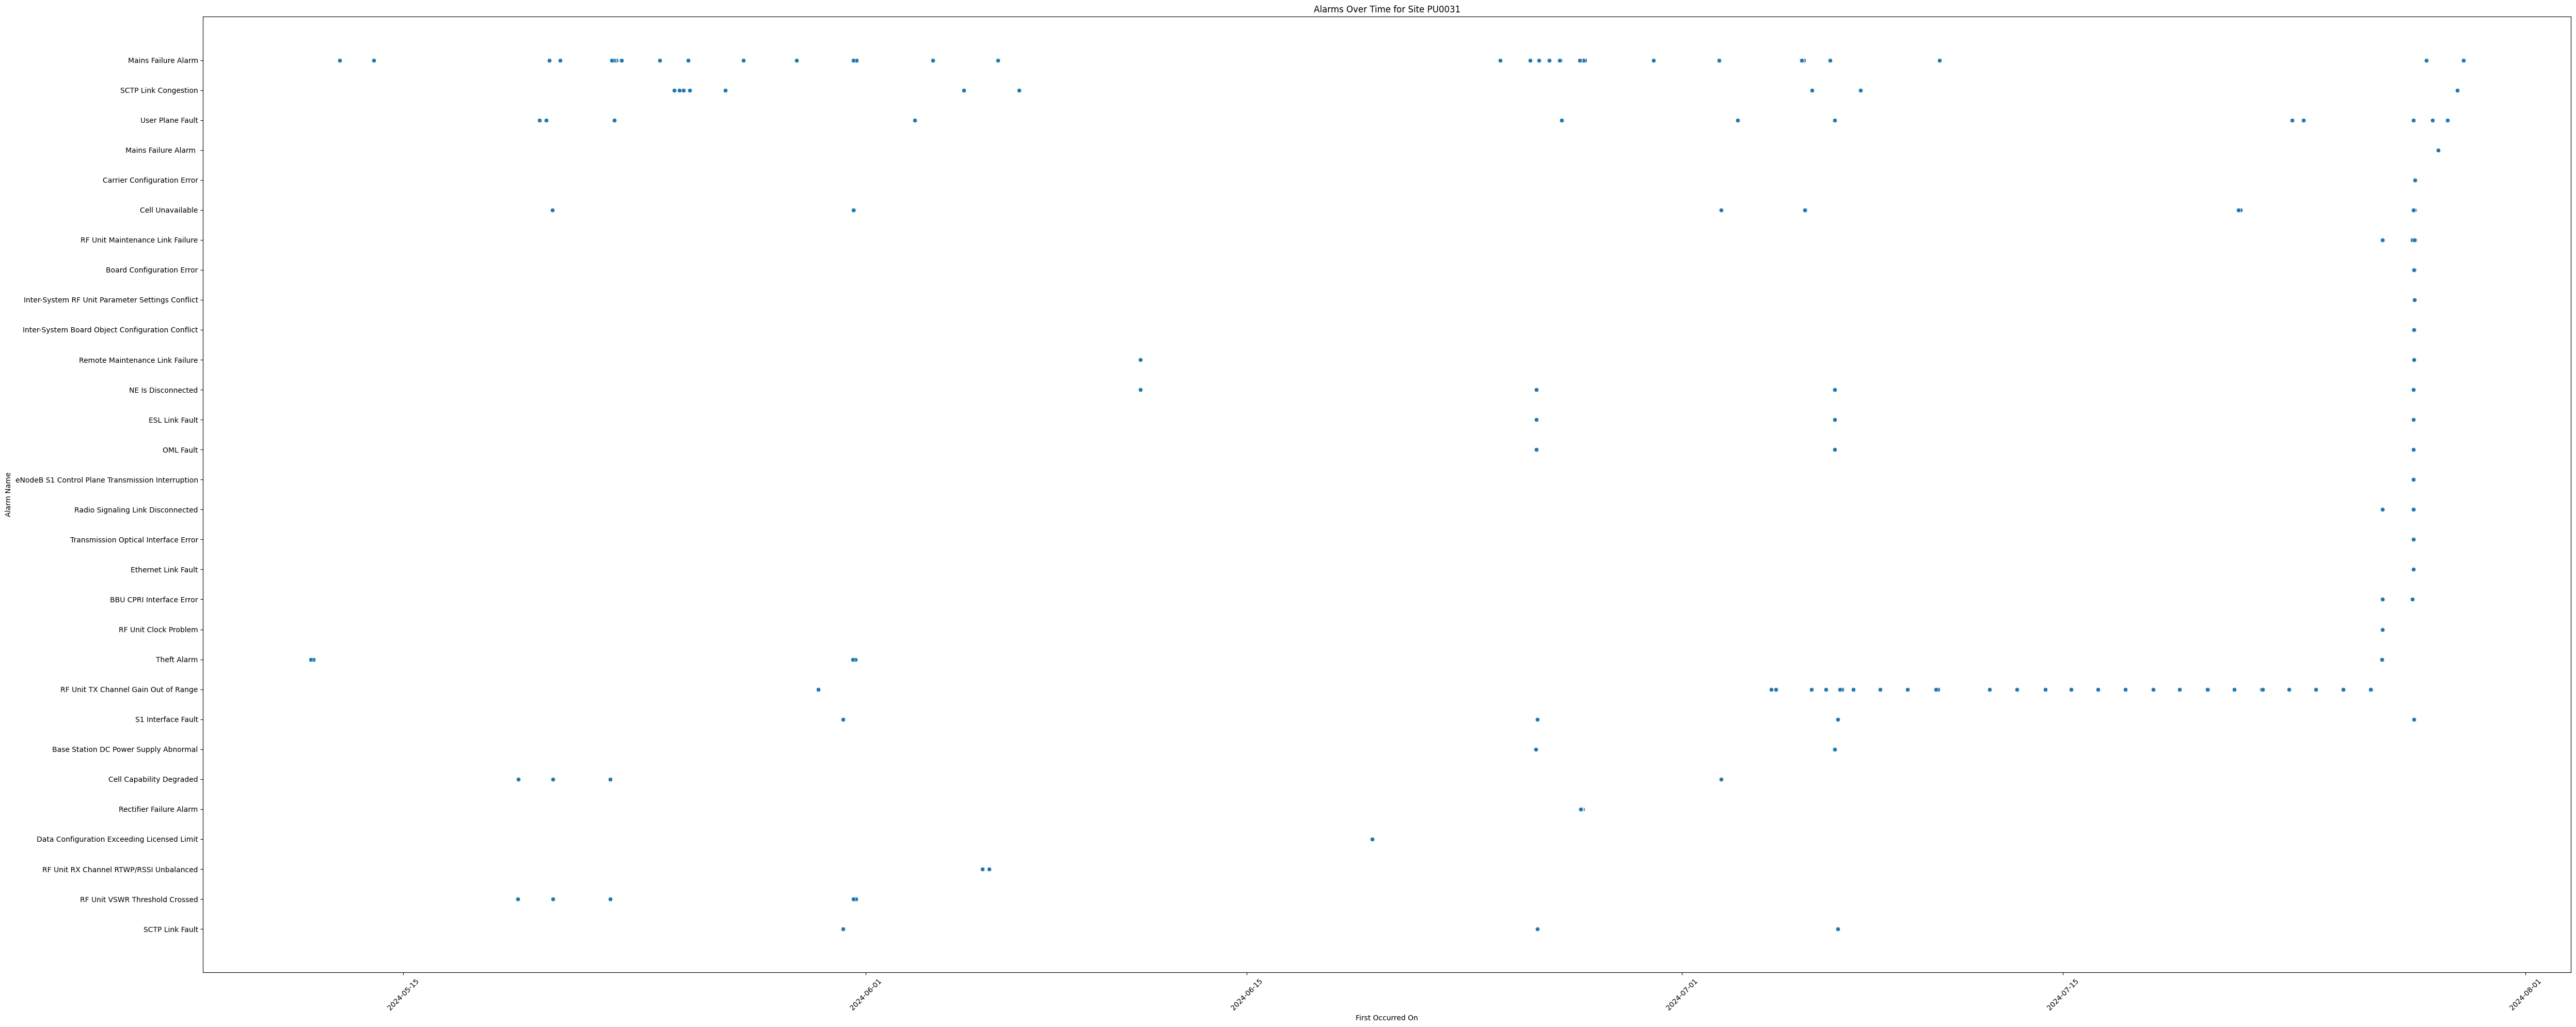

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is already loaded into a DataFrame called 'data'

# Convert 'First Occurred On' to datetime format
data['First Occurred On'] = pd.to_datetime(data['First Occurred On'])


# Set the figure size
plt.figure(figsize=(50, 20))

# Create the scatter plot
sns.scatterplot(x='First Occurred On', y='Alarm Name', data=data)

# Set title and labels
plt.title('Alarms Over Time for Site PU0031')
plt.xlabel('First Occurred On')
plt.ylabel('Alarm Name')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


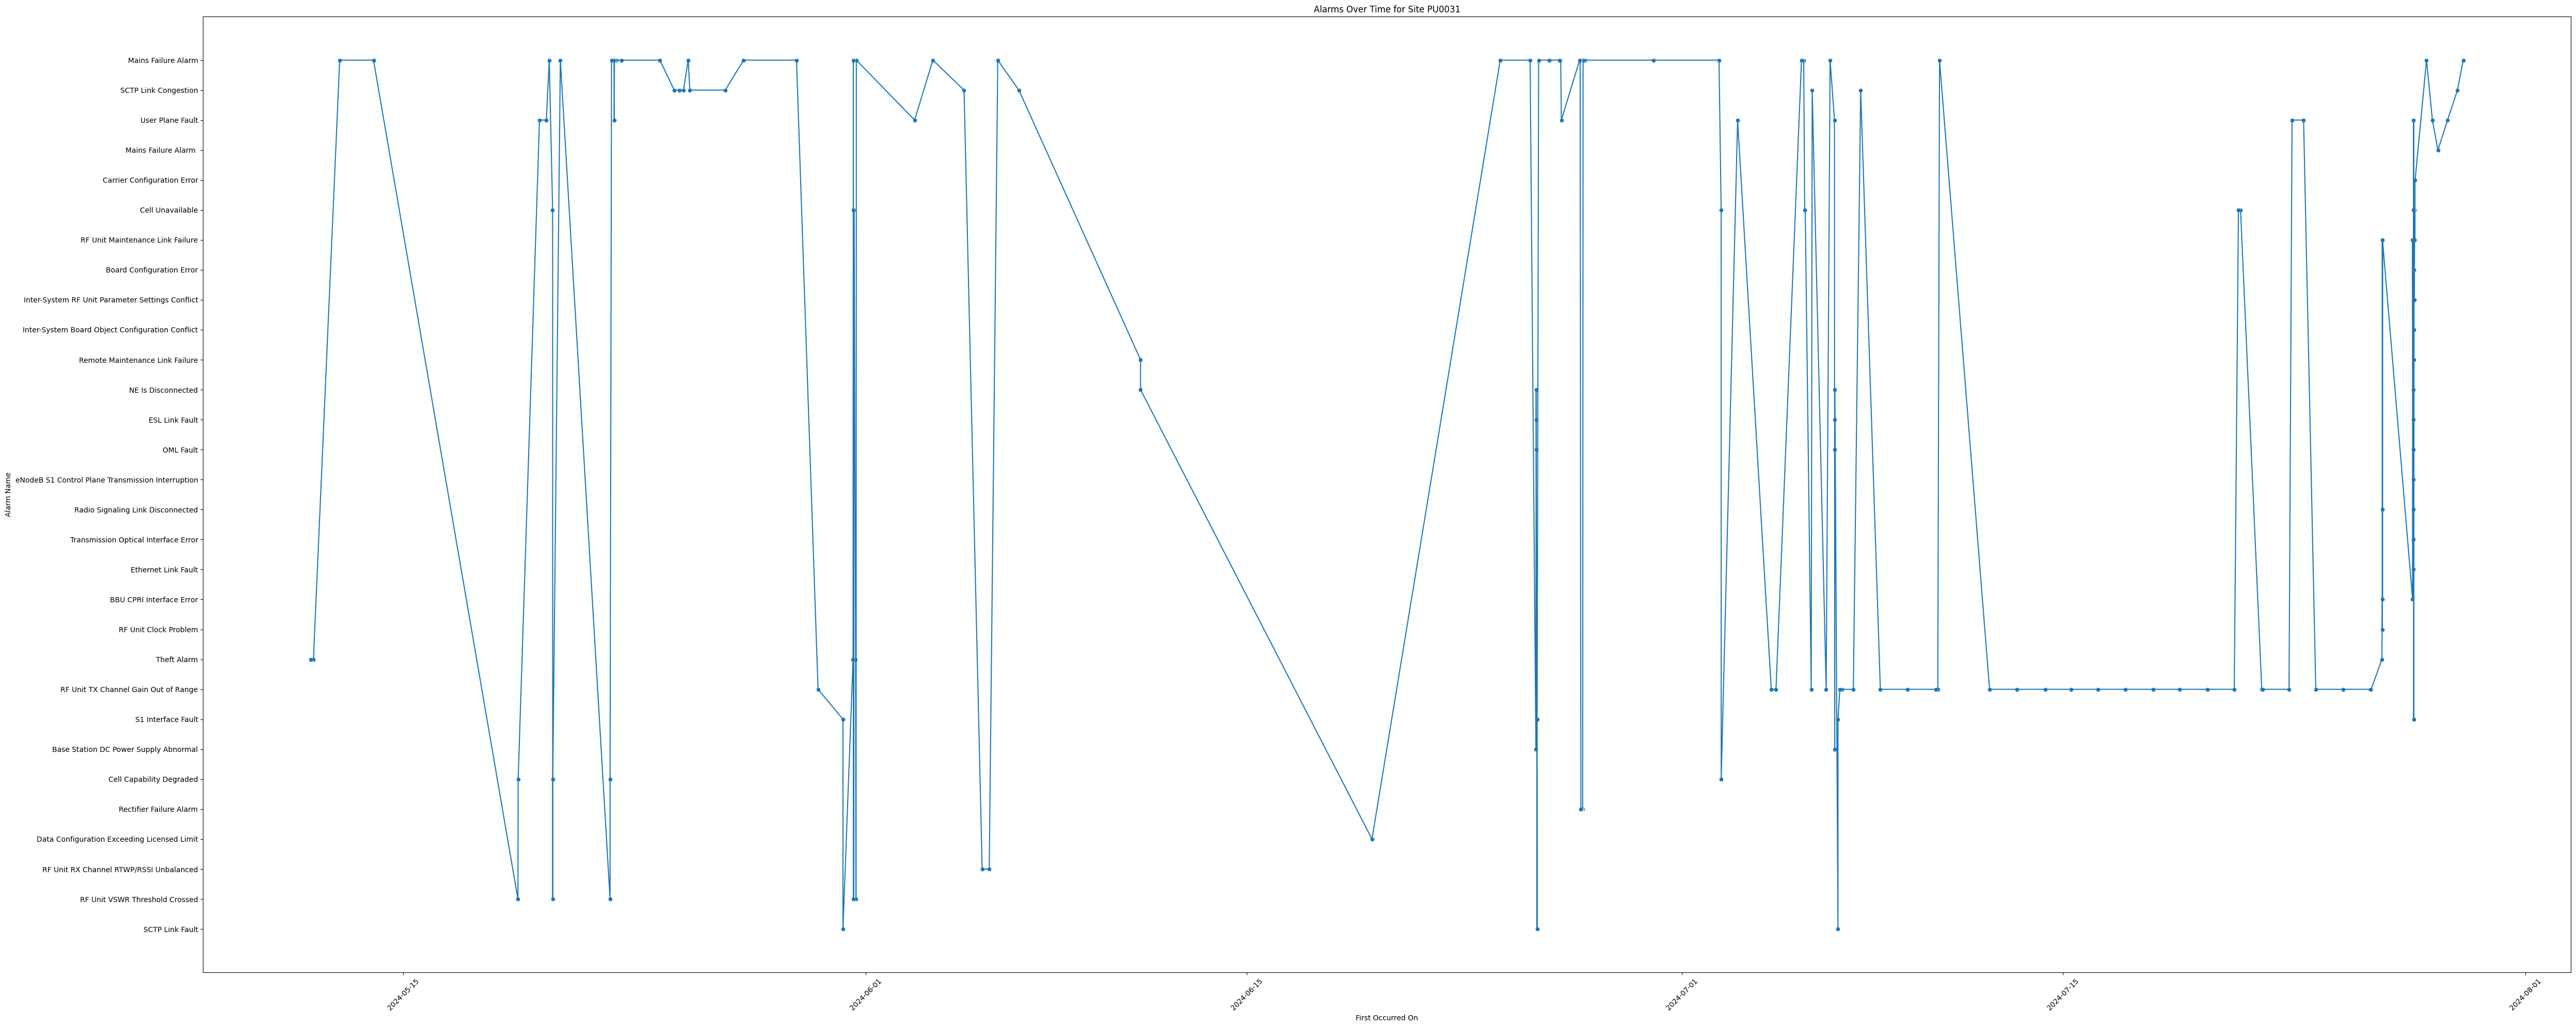

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(50, 20))

# Create the scatter plot
sns.scatterplot(x='First Occurred On', y='Alarm Name', data=data)

# Group by 'Relative Day Index' and 'Alarm Name' to create the line plot
grouped = data.groupby(['First Occurred On', 'Alarm Name']).size().reset_index(name='count')

# Sort the grouped data by 'Relative Day Index'
grouped = grouped.sort_values('First Occurred On')

# Create the line plot to connect the dots
sns.lineplot(x='First Occurred On', y='Alarm Name', data=grouped, markers=True, dashes=False, estimator=None)

# Set title and labels
plt.title('Alarms Over Time for Site PU0031')
plt.xlabel('First Occurred On')
plt.ylabel('Alarm Name')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


In [4]:

# Sort by 'First Occurred On' in descending order (latest alarms first)
df = data.sort_values(by='First Occurred On', ascending=False)

# Convert 'First Occurred On' to datetime, handle errors and fill NaT with a default date
df['First Occurred On'] = pd.to_datetime(df['First Occurred On'], errors='coerce')

# Reference time
reference_time = pd.to_datetime('2024-07-25 11:45:00')

# Calculate the relative day index, handle NaT by filling with a large negative number
df['Relative Day Index'] = ((df['First Occurred On'] - reference_time).dt.total_seconds() // 3600).fillna(-9999).astype(int)

# Adjust the index to set the 08:00 to 08:00 of the next day as 0, and previous days as -1, -2, -3, etc.
df['Relative Day Index'] = df['Relative Day Index'].apply(lambda x: x if x < 0 else x)


# Print the updated dataframe
df.head(50000)

,Last Occurred On,Alarm Source,Alarm Severity,Alarm Name,Alarm ID,Alarm Location Info,Site Name,Cleared On,First Occurred On,Clearance Status,Ticket ID,Site ID,Vendor,Domain,Device Type,Relative Day Index
5,2024-07-29 16:58:29,Koswadiya-PU0031-DG,Major,Mains Failure Alarm,65085,"Cabinet No.=0, Subrack No.=0, Slot No.=19, Por...",Koswadiya,2024-07-29 17:13:32,2024-07-29 16:58:29,Cleared,NaN,PU0031,HUAWEI,Power,eGBTS,101
6,2024-07-29 11:55:15,Koswadiya-PU0031-BHOP,Major,SCTP Link Congestion,25889,"Link No.=70337, Current transmit buffer usage ...",Koswadiya,2024-07-29 22:17:43,2024-07-29 11:55:15,Cleared,NaN,PU0031,HUAWEI,Access,eNodeB,96
7,2024-07-29 03:09:51,Koswadiya-PU0031-L,Major,User Plane Fault,25954,Service Type=X2,Koswadiya,2024-07-29 04:28:23,2024-07-29 03:09:51,Cleared,NaN,PU0031,HUAWEI,Access,eNodeB,87
9,2024-07-28 18:40:08,U2020ACC,Major,Mains Failure Alarm,65085,"Cabinet No.=0, Subrack No.=0, Slot No.=19, Por...",Koswadiya,2024-07-28 18:44:20,2024-07-28 18:40:08,Cleared,NaN,PU0031,HUAWEI,Access,NaN,78
10,2024-07-28 13:47:51,Koswadiya-PU0031-L,Major,User Plane Fault,25954,Service Type=X2,Koswadiya,2024-07-28 15:28:23,2024-07-28 13:47:51,Cleared,NaN,PU0031,HUAWEI,Access,eNodeB,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,2024-05-13 21:44:08,Koswadiya-PU0031-DG,Major,Mains Failure Alarm,65085,"Cabinet No.=0, Subrack No.=0, Slot No.=19, Por...",Koswadiya,2024-05-13 21:44:26,2024-05-13 21:44:08,Cleared,NaN,PU0031,HUAWEI,Power,eGBTS,-1743
413,2024-05-12 15:54:32,Koswadiya-PU0031-DG,Major,Mains Failure Alarm,65085,"Cabinet No.=0, Subrack No.=0, Slot No.=19, Por...",Koswadiya,2024-05-12 16:01:40,2024-05-12 15:54:32,Cleared,NaN,PU0031,HUAWEI,Power,eGBTS,-1772
414,2024-05-11 16:45:14,Koswadiya-PU0031-DG,Critical,Theft Alarm,65097,"Cabinet No.=0, Subrack No.=0, Slot No.=19, Por...",Koswadiya,2024-05-11 16:45:35,2024-05-11 16:45:14,Cleared,NaN,PU0031,HUAWEI,Power,eGBTS,-1795
415,2024-05-11 16:35:26,Koswadiya-PU0031-DG,Critical,Theft Alarm,65097,"Cabinet No.=0, Subrack No.=0, Slot No.=19, Por...",Koswadiya,2024-05-11 16:42:50,2024-05-11 16:35:26,Cleared,NaN,PU0031,HUAWEI,Power,eGBTS,-1796


In [ ]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder

# Filter the data for HUAWEI and Access domain
filtered_data = df[(df['Vendor'] == 'HUAWEI')]
#(data['Domain'] == 'Access')



# Retain only the specified columns
columns_to_keep = ['Site ID', 'Alarm Name', 'Vendor', 'Domain', 'Device Type', 'Relative Day Index']
df_filtered = filtered_data[columns_to_keep]

df_filtered.head(50000)

,Site ID,Alarm Name,Vendor,Domain,Device Type,Relative Day Index
0,PU0031,Cell Out of Service,HUAWEI,Access,eGBTS,141
1,PU0031,Battery Deep Discharge Alarm,HUAWEI,Power,eGBTS,101
3,PU0031,Battery Deep Discharge Alarm,HUAWEI,Power,eGBTS,101
4,PU0031,Battery Deep Discharge Alarm,HUAWEI,Power,eGBTS,101
2,PU0031,Battery Deep Discharge Alarm,HUAWEI,Power,eGBTS,101
...,...,...,...,...,...,...
412,PU0031,Battery Deep Discharge Alarm,HUAWEI,Power,eGBTS,-1772
413,PU0031,Mains Failure Alarm,HUAWEI,Power,eGBTS,-1772
414,PU0031,Theft Alarm,HUAWEI,Power,eGBTS,-1795
415,PU0031,Theft Alarm,HUAWEI,Power,eGBTS,-1796


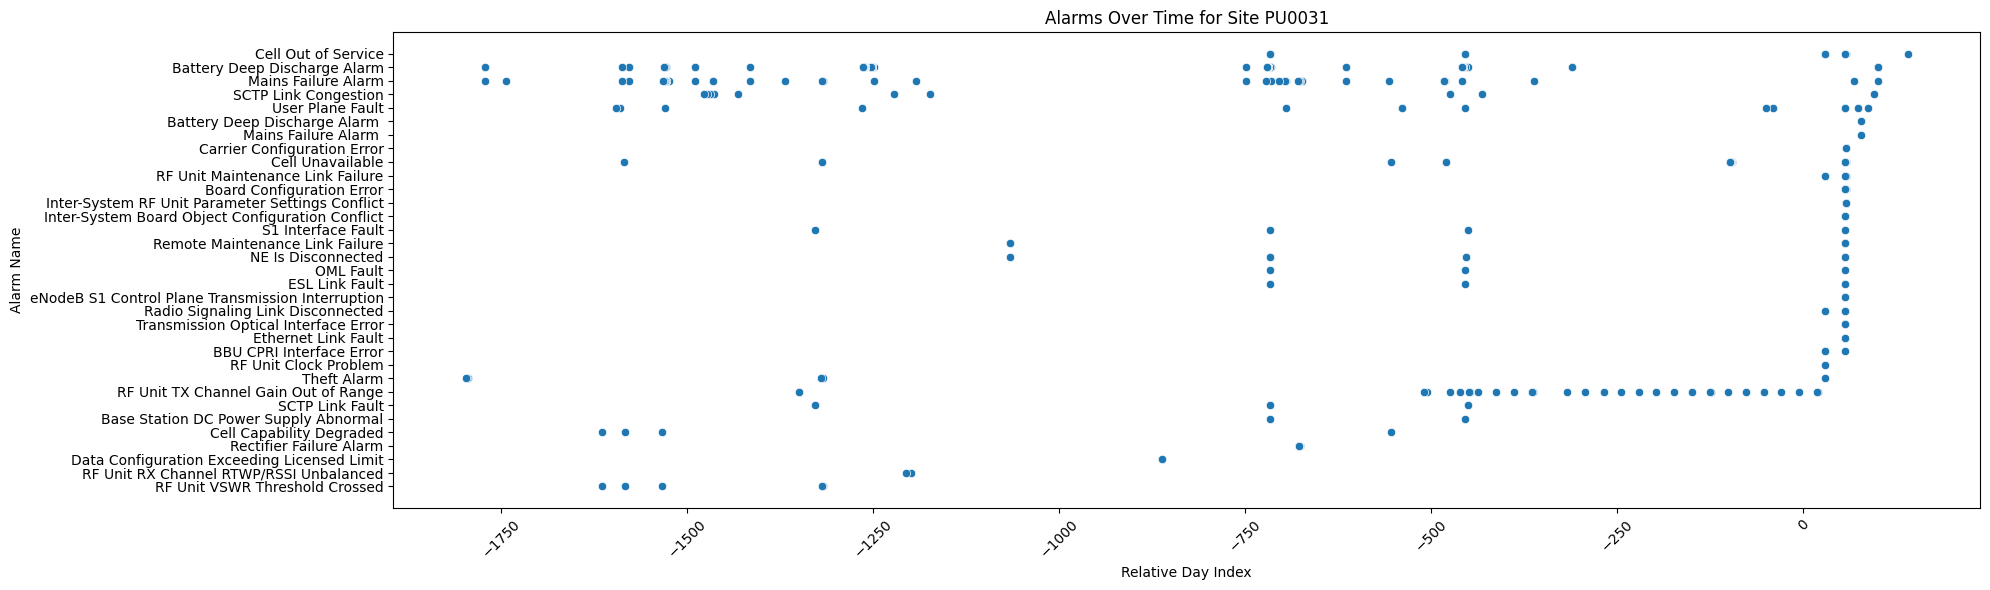

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(20, 6))

# Create the scatter plot
sns.scatterplot(x='Relative Day Index', y='Alarm Name', data=df_filtered)

# Set title and labels
plt.title('Alarms Over Time for Site PU0031')
plt.xlabel('Relative Day Index')
plt.ylabel('Alarm Name')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

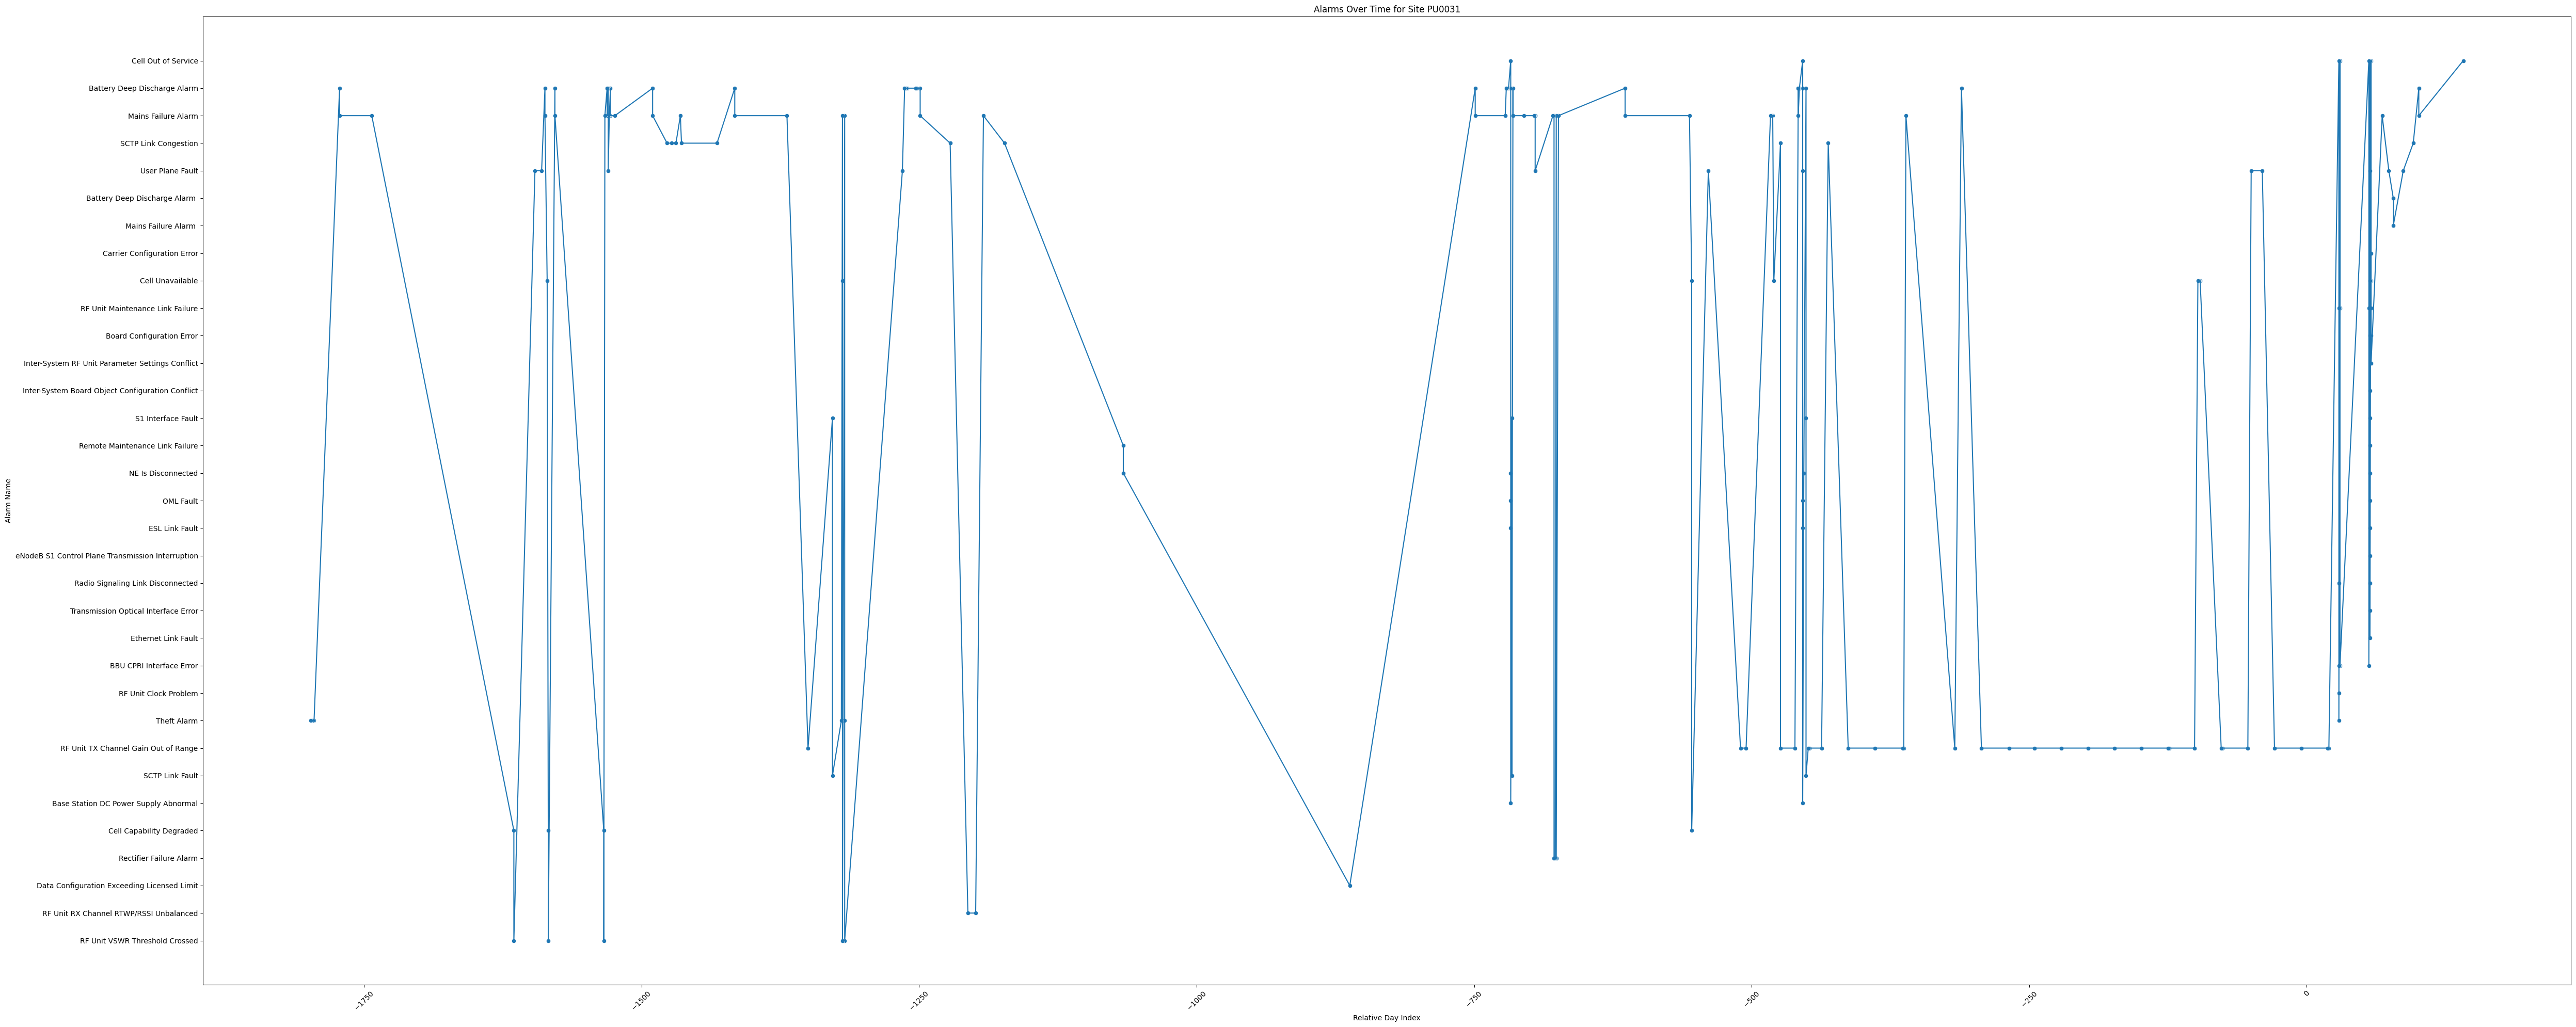

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(50, 20))

# Create the scatter plot
sns.scatterplot(x='Relative Day Index', y='Alarm Name', data=df_filtered)

# Group by 'Relative Day Index' and 'Alarm Name' to create the line plot
grouped = df_filtered.groupby(['Relative Day Index', 'Alarm Name']).size().reset_index(name='count')

# Sort the grouped data by 'Relative Day Index'
grouped = grouped.sort_values('Relative Day Index')

# Create the line plot to connect the dots
sns.lineplot(x='Relative Day Index', y='Alarm Name', data=grouped, markers=True, dashes=False, estimator=None)

# Set title and labels
plt.title('Alarms Over Time for Site PU0031')
plt.xlabel('Relative Day Index')
plt.ylabel('Alarm Name')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
# Encode categorical columns
categorical_columns = ['Site ID', 'Domain','Vendor', 'Device Type', 'Alarm Name']
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df_filtered[column] = le.fit_transform(df_filtered[column].astype(str))
    label_encoders[column] = le # Use the same dataset as the training and testing dataset


# Normalize the 'Relative Day Index'
scaler = MinMaxScaler()
df_filtered['Relative Day Index'] = scaler.fit_transform(df_filtered[['Relative Day Index']])

# Use the same dataset as the training and testing dataset
train_data = df_filtered.copy()
test_data = df_filtered.copy()

<ipython-input-61-a8287ae391f7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[column] = le.fit_transform(df_filtered[column].astype(str))
<ipython-input-61-a8287ae391f7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[column] = le.fit_transform(df_filtered[column].astype(str))
<ipython-input-61-a8287ae391f7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [ ]:
# Prepare the data for LSTM
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequence = data.iloc[i:i + sequence_length].to_numpy()
        label = data['Alarm Name'].iloc[i + sequence_length]
        sequences.append((sequence, label))
    return sequences

sequence_length = 10
train_sequences = create_sequences(train_data, sequence_length)
test_sequences = create_sequences(test_data, sequence_length)

X_train = np.array([seq[0] for seq in train_sequences]).astype('float32')
y_train = np.array([seq[1] for seq in train_sequences]).astype('float32')
X_test = np.array([seq[0] for seq in test_sequences]).astype('float32')
y_test = np.array([seq[1] for seq in test_sequences]).astype('float32')



In [ ]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Build the LSTM model
model = Sequential()
model.add(LSTM(100, input_shape=(sequence_length, len(columns_to_keep)), return_sequences=True))
model.add(LSTM(100))
model.add(Dense(1, activation='linear'))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2)



Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 68s 53ms/step - loss: 216.3382 - val_loss: 247.5953
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 201.4836 - val_loss: 233.8978
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 175.5132 - val_loss: 219.2305
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 181.0348 - val_loss: 202.2809
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 153.5074 - val_loss: 184.0203
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 137.4455 - val_loss: 165.6481
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 115.4326 - val_loss: 149.0889
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 107.9436 - val_loss: 136.2171
Epoch 9/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 100.5738 - val_loss: 126.5139
Epoch 10/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 88.5161 - val_loss: 119.3540
Epoch 11/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 87.1347 - val_loss: 113.7311
Epoch 12/

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 33.2483
Test Loss: 43.71453094482422
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
Test Accuracy: 0.009732360097323601


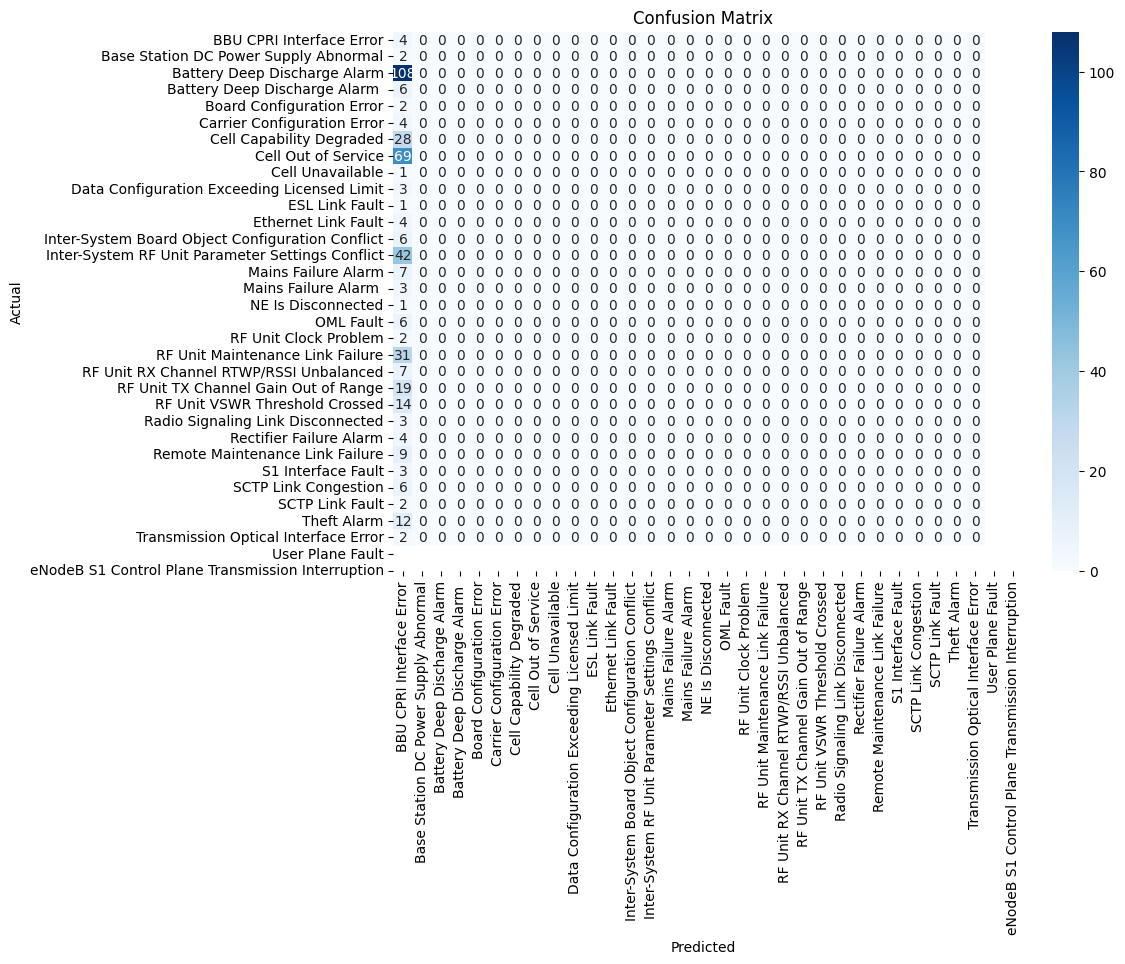

First 10 Predictions:
['BBU CPRI Interface Error']


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Make predictions
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)  # Get the class with the highest probability

# Calculate accuracy
accuracy = np.mean(predictions == y_test)
print(f'Test Accuracy: {accuracy}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoders['Alarm Name'].classes_,
            yticklabels=label_encoders['Alarm Name'].classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Rescale predictions back to original scale
predictions_rescaled = label_encoders['Alarm Name'].inverse_transform(predictions)

# Print the first 10 predictions
print("First 10 Predictions:")
print(predictions_rescaled[:1])

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
First 10 Predictions:
['OML Fault' 'RF Unit Maintenance Link Failure'
 'Inter-System RF Unit Parameter Settings Conflict'
 'Data Configuration Exceeding Licensed Limit' 'Cell Unavailable']


In [ ]:

# Encode categorical columns
categorical_columns = ['Site ID', 'Domain', 'Device Type', 'Alarm Name']
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df_filtered[column] = le.fit_transform(df_filtered[column].astype(str))
    label_encoders[column] = le

# Target variable
target_alarm = 'RF Unit TX Channel Gain Out of Range'
target_alarm_encoded = label_encoders['Alarm Name'].transform([target_alarm])[0]

# Prepare data for LSTM
sequence_length = 10  # Define the sequence length for LSTM
features = ['Site ID', 'Domain', 'Device Type']
X, y = [], []

for i in range(len(df_filtered) - sequence_length):
    alarm_sequence = df_filtered.iloc[i:i + sequence_length]
    next_alarm = df_filtered.iloc[i + sequence_length]
    if next_alarm['Alarm Name'] == target_alarm_encoded:
        X.append(alarm_sequence[features].values)
        y.append(next_alarm['Relative Day Index'])

X = np.array(X)
y = np.array(y).astype(int)  # Ensure y is an array of integers

# Split data into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(sequence_length, len(features)), return_sequences=True))
model.add(LSTM(64))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Function to predict next alarm's Relative Day Index
def predict_next_alarm(alarm_sequence, model):
    prediction = model.predict(np.array([alarm_sequence]))
    return int(np.round(prediction[0][0]))  # Ensure the prediction is an integer

# Example prediction
example_sequence = X_test[0]
predicted_value = predict_next_alarm(example_sequence, model)
print(f"Predicted Relative Day Index for 'RF Unit TX Channel Gain Out of Range': {predicted_value}")